In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset Case Study 2 - Prediksi Cara Kelahiran Bayi.xlsx to Dataset Case Study 2 - Prediksi Cara Kelahiran Bayi (1).xlsx


In [ ]:
churn_df = pd.read_excel("Dataset Case Study 2 - Prediksi Cara Kelahiran Bayi.xlsx")
churn_df.head( )

,ID,Usia,Melahirkan ke-,Waktu Melahirkan,Tekanan Darah,Gangguan Jantung,Melahirkan Normal
0,1,22,1,0,2,0,1
1,2,26,2,0,1,0,0
2,3,26,2,1,1,0,1
3,4,28,1,0,2,0,1
4,5,22,2,0,1,0,0


**DATA PRE-PROCESSING AND SELECTION**

In [ ]:
print(churn_df.shape)
print(churn_df.columns.values)

(80, 7)
['ID' 'Usia' 'Melahirkan ke-' 'Waktu Melahirkan' 'Tekanan Darah'
 'Gangguan Jantung' 'Melahirkan Normal']


In [ ]:
X = np.asarray(churn_df[['Usia', 'Melahirkan ke-', 'Waktu Melahirkan', 'Tekanan Darah', 'Gangguan Jantung']])
X[0:5]

array([[22,  1,  0,  2,  0],
       [26,  2,  0,  1,  0],
       [26,  2,  1,  1,  0],
       [28,  1,  0,  2,  0],
       [22,  2,  0,  1,  0]])

In [ ]:
y = np.asarray(churn_df['Melahirkan Normal'])
y [0:5]

array([1, 0, 1, 1, 0])

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.14058733, -0.83894793, -0.78704079,  1.41421356, -0.77459667],
       [-0.33841602,  0.42738857, -0.78704079,  0.        , -0.77459667],
       [-0.33841602,  0.42738857,  0.447533  ,  0.        , -0.77459667],
       [ 0.06266963, -0.83894793, -0.78704079,  1.41421356, -0.77459667],
       [-1.14058733,  0.42738857, -0.78704079,  0.        , -0.77459667]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (64, 5) (64,)
Test set: (16, 5) (16,)


MODELING (LOGISTIC REGRESSION)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.51033487, 0.48966513],
       [0.51010394, 0.48989606],
       [0.49244466, 0.50755534],
       [0.47464699, 0.52535301],
       [0.50880156, 0.49119844],
       [0.55019929, 0.44980071],
       [0.49957094, 0.50042906],
       [0.50654609, 0.49345391],
       [0.47736523, 0.52263477],
       [0.49684646, 0.50315354],
       [0.52296661, 0.47703339],
       [0.55094605, 0.44905395],
       [0.53250423, 0.46749577],
       [0.5171382 , 0.4828618 ],
       [0.49806201, 0.50193799],
       [0.48713989, 0.51286011]])

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.375

**JACCARD INDEX**

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.375

**CONDUSION MATRIX**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[3 1]
 [4 8]]


Confusion matrix, without normalization
[[3 1]
 [4 8]]


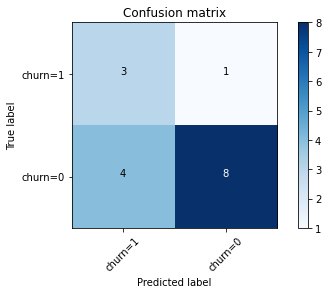

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [ ]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.43      0.75      0.55         4

    accuracy                           0.69        16
   macro avg       0.66      0.71      0.65        16
weighted avg       0.77      0.69      0.71        16



In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6773422100519193